Probe statement:

To make an explorative data analysis and build a prediction model for the hourly utilization “cnt” of this data set: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset.

#Load the relevant libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#Load the data set:

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Bike-Sharing-Dataset/hour.csv')

Information about the attributes:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

source:https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

Check dimensions of dataset and display first 10 rows:

In [ ]:
df.shape  

(17379, 17)

In [ ]:
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Display information regarding the attributes:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Check for missinng values:

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


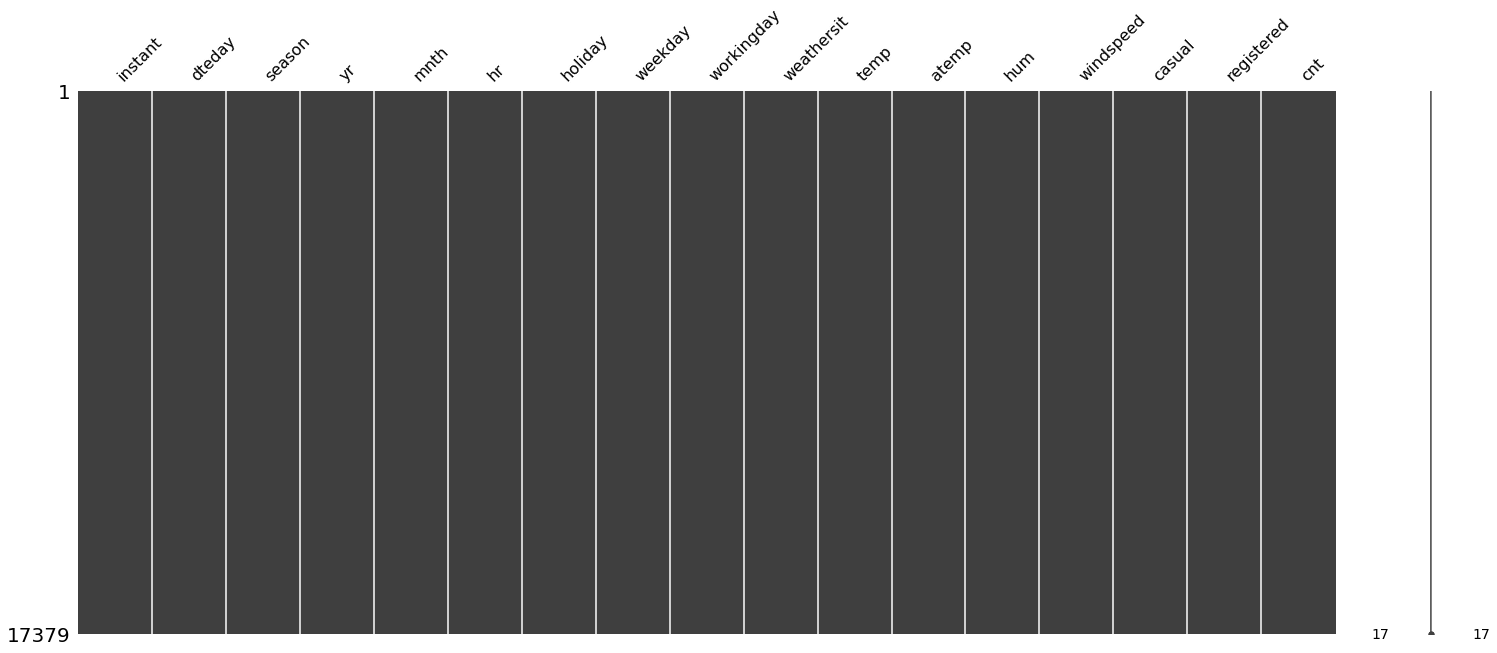

In [ ]:
msno.matrix(df)
print(df.isnull().sum())

No missing values are found in the dataset

1. Rename the variables with easily understandable names.
2. Map the integer values to understandable text.
3. Change the dtypes of categorical variables to categorical.

In [ ]:
df = df.rename(columns = {'yr':'year', 'mnth':'month', 'hr':'hour', 'hum':'humidity', 'cnt':'count', 'weathersit':'weather', 'temp':'temperature'})

In [ ]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer',3:'fall', 4: 'winter'})
df['weekday'] = df['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thurs',5:'Fri',6:'Sat'})
df['weather'] = df['weather'].map({1:'Clear', 2:'Mist+Cloudy',3:'Light Rain or Snow', 4:'Heavy Rain' })
df['workingday'] = df['workingday'].map({0:'non_working_day', 1:'working_day'})

In [ ]:
columns = ['season', 'weekday', 'weather', 'holiday', 'workingday', 'hour', 'month']

for column in columns:
  df[column] = df[column].astype('category')

#Exploratory Data Analysis

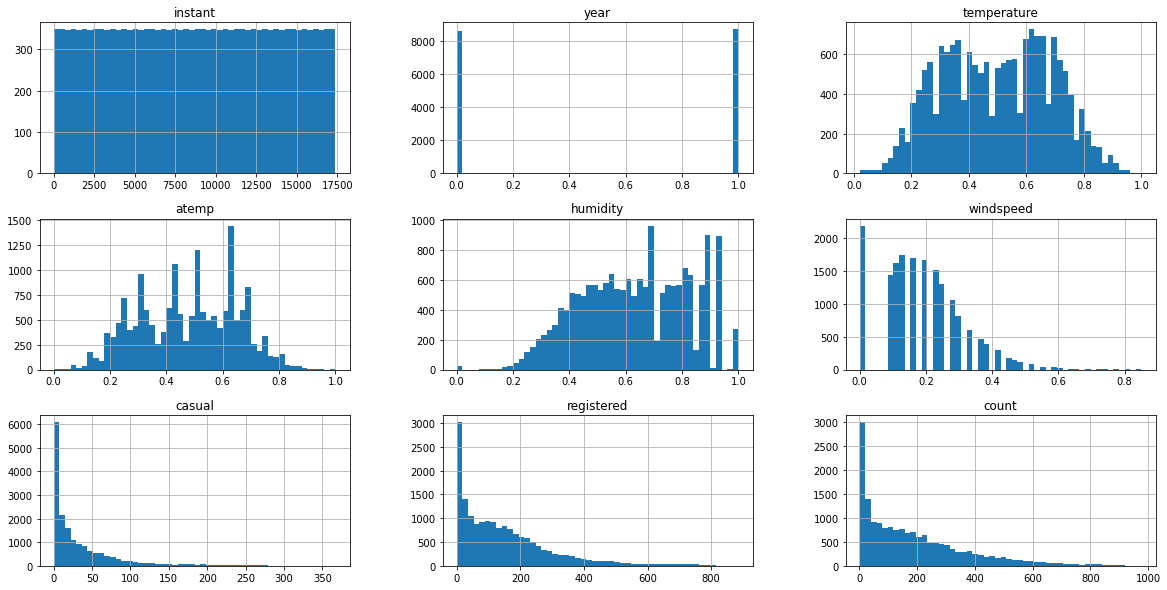

In [ ]:
#Univariate analysis to visualize distribution of the different variables:
df.hist(bins = 50, figsize = (20,10))
plt.savefig('Univariate Analysis Plots')
plt.show()

Visualizing the hourly average count of users for working and non-working days:

[Text(0.5, 1.0, 'Avg. count of users at different hours on working and non-working days:')]

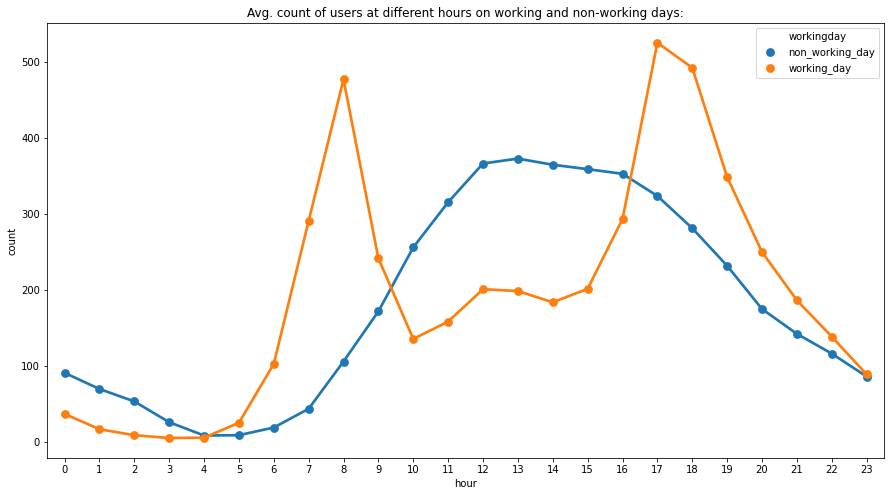

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
sns.pointplot(data = df, x ='hour', y = 'count', hue = 'workingday', ax = ax, ci = None).set(title = 'Avg. count of users at different hours on working and non-working days:')

Visualising the hourly avg. number of registered users on diffferent hours on different days of the week:

[Text(0.5, 1.0, 'Count of registered users at different hours through the week:')]

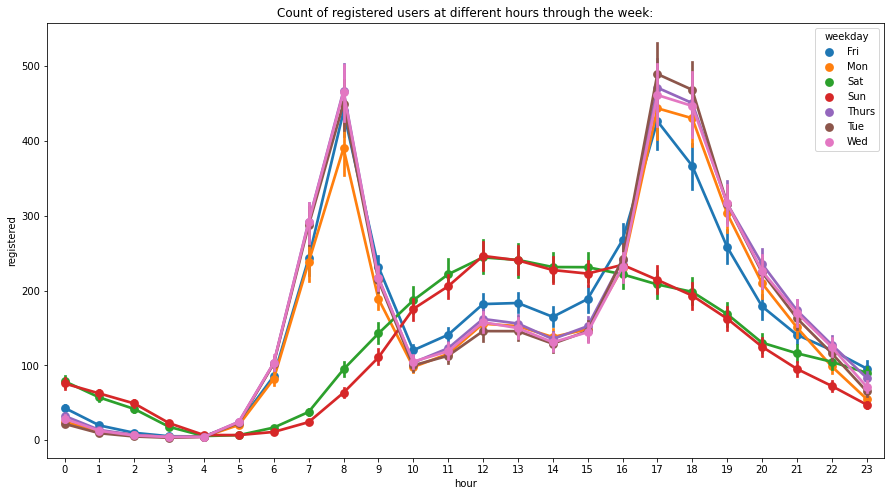

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
sns.pointplot(data = df, x ='hour', y = 'registered', hue = 'weekday', ax = ax).set(title = 'Count of registered users at different hours through the week:')

Visualising the hourly avg. number of casual users on diffferent hours on different days of the week:

[Text(0.5, 1.0, 'Count of casual users at different hours through the week:')]

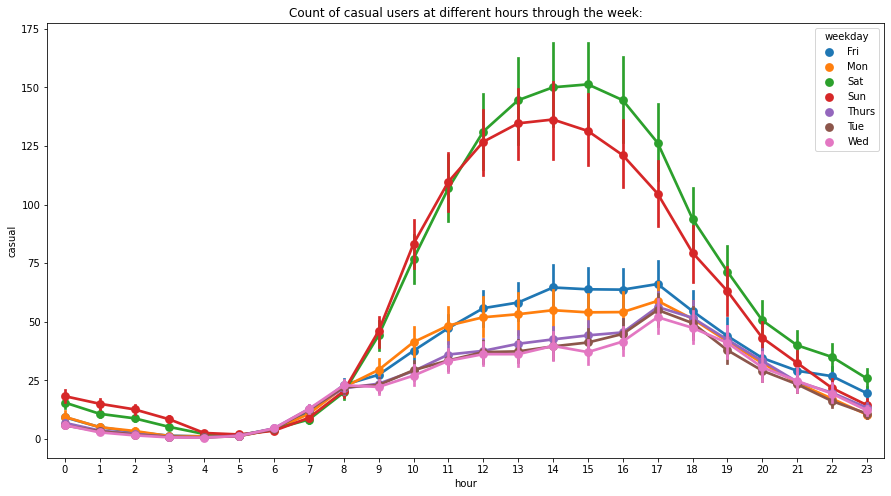

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
sns.pointplot(data = df, x ='hour', y = 'casual', hue = 'weekday', ax = ax).set(title = 'Count of casual users at different hours through the week:')

Visualising the hourly avg. number of users on diffferent hours on different days of the week:

[Text(0.5, 1.0, 'Count of users at different hours through the week:')]

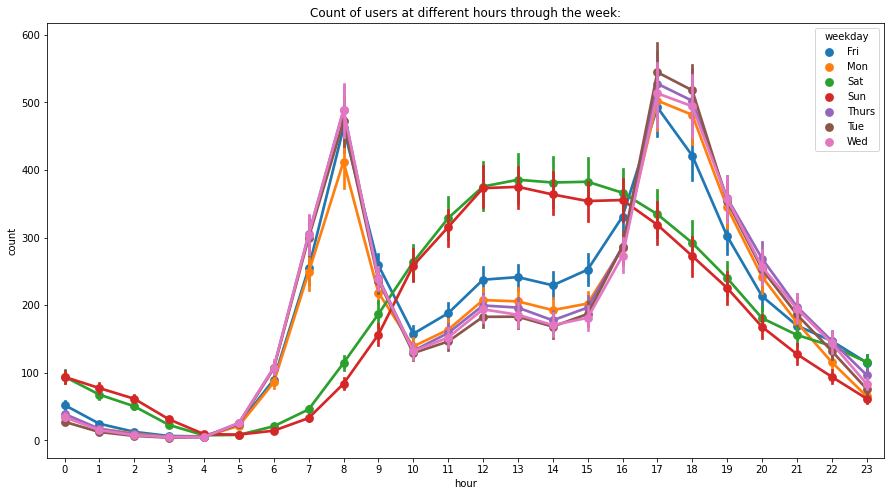

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
sns.pointplot(data = df, x ='hour', y = 'count', hue = 'weekday', ax = ax).set(title = 'Count of users at different hours through the week:')

###Observations:

1. On weekdays, the bike rental count is high in the morning hours from 7 to 8 am and from 16 to 18. This may be, because these are the conventional times for commuting to and from work, schools, universities. 

2. On weekends, people are more likely to rent bikes between 10 am and 16pm. 

3. Casual users are more likely to use the service on weekends rather than during the weekdays.

4. Registered users make up the majority of the user group during the weekdays.

5. The usage pattern for non-working days is similar for the weekend plots and the casual users plot in the graphs above. 

Average hourly count of users during each weather pattern:

In [ ]:
df['weather'].value_counts()

Clear                 11413
Mist+Cloudy            4544
Light Rain or Snow     1419
Heavy Rain                3
Name: weather, dtype: int64

[Text(0.5, 1.0, 'Count of users at different hours during each weather pattern:')]

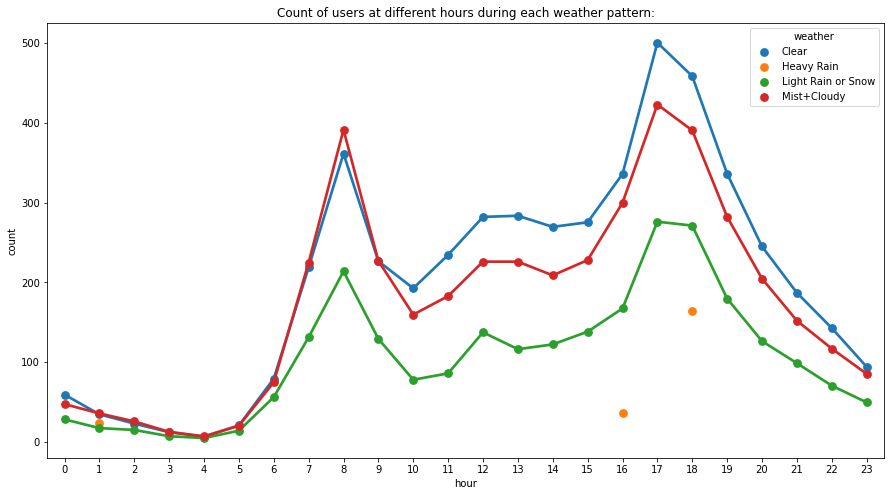

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
sns.pointplot(data = df, x ='hour', y = 'count', hue = 'weather', ax = ax, ci = None).set(title = 'Count of users at different hours during each weather pattern:')

Correlation Matrix:

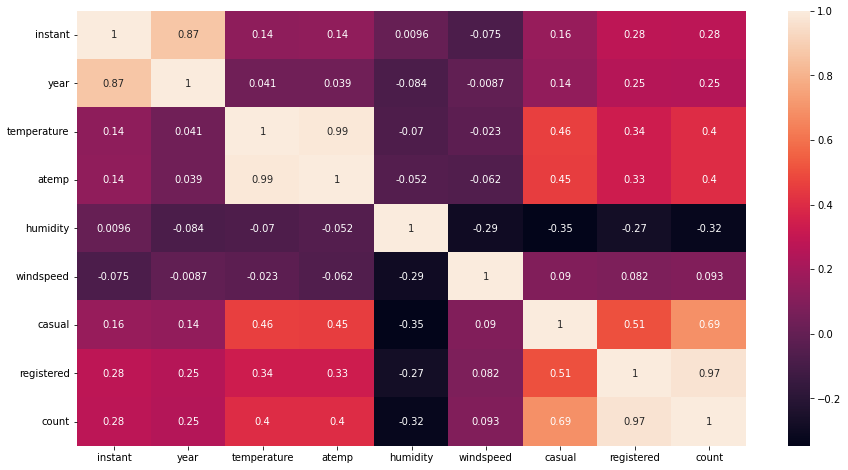

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True)

1. The columns 'atemp' and 'temperature'rature' are strongly correlated, therefore dropping the 'atemp' column to avoid multicollinearity. 

<!-- Mulitcollinearity in regression problems may lead to the problem of overfitting. The correltion matrix can be seen for columns with numerical variables and not categorical variables. -->

2. The variable 'count' is strongly correlated with 'registered' and 'casual' as count = casual + registered. Therefore we drop 'registered' and 'casual' for modelling purposes.

3. Windspeed does not seem to have an effect on the number of people using the sharing service

In [ ]:
#Drop the irrelevant features:
df.drop(['windspeed', 'atemp', 'casual', 'registered' ,'dteday', 'year', 'instant', 'holiday'], axis = 1, inplace = True)

Regression Plots:

[Text(0.5, 1.0, 'Relation between humidity and users')]

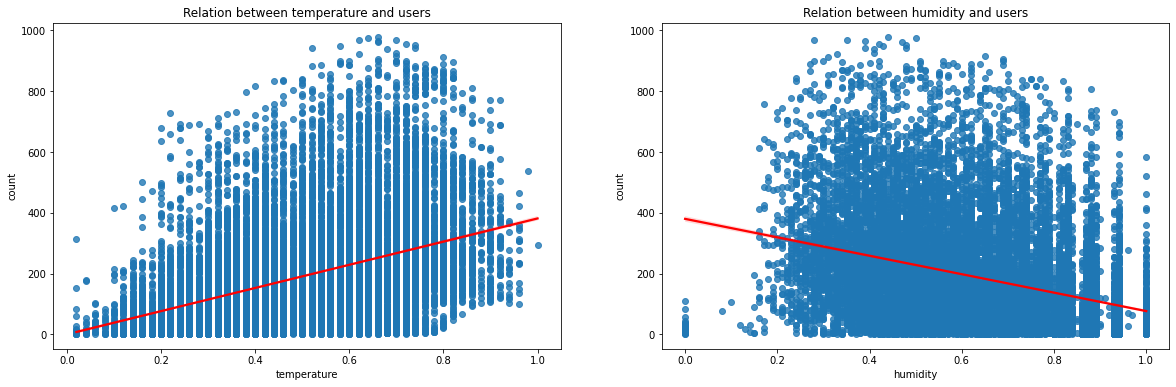

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temperature'], y=df['count'], ax=ax1, line_kws = {'color' :'red'})
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2, line_kws = {'color' :'red'})
ax2.set(title="Relation between humidity and users")

From the plots above, we can infer:


1. 'count' and humidity' have a strong negative correlation. As the humidity increases, the count of users decreases.

2. The 'count' and 'temperature' variables are stronly positively correlated. As the temperature increases, the number of users sees an upward trend.

<!-- This is a regression problem and thus we need to normalize the values of the target variables.  -->

Distribution of 'count'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Theoritical quantiles')]

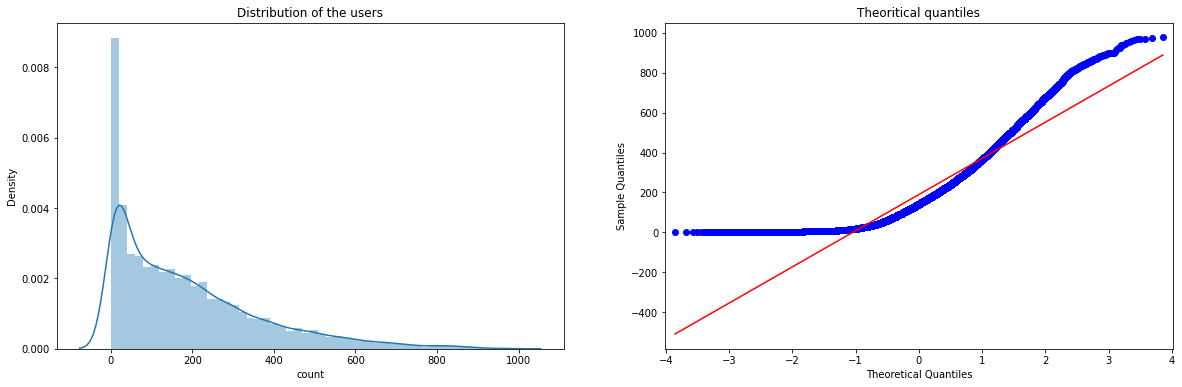

In [ ]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

The target variable 'count' is right skewed, therefore, we apply log transformation to get a normal distribution.

In [ ]:
df['count'] = np.log(df['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Theoritical quantiles')]

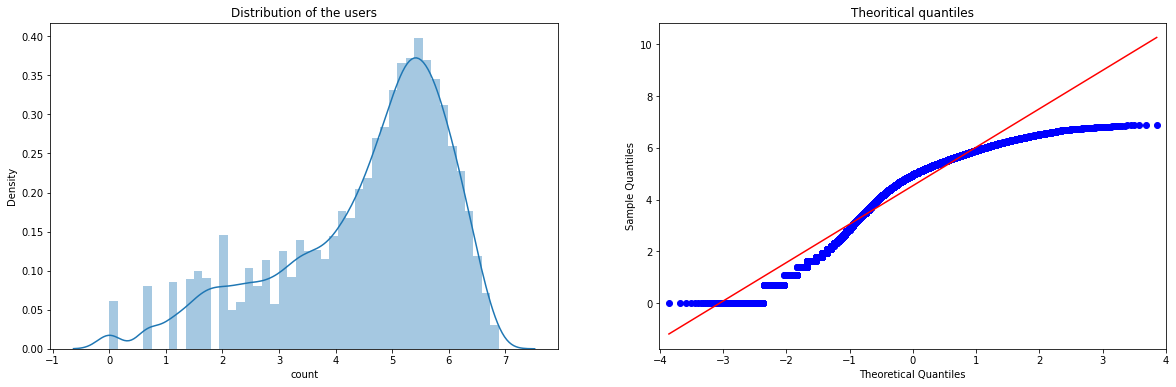

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

#Building prediction model:

we need encoding methods to convert non-numerical data to meaningful numerical data. 
'get_dummies' is one of the easiest way to implement one hot encoding.

In [ ]:
hour = pd.get_dummies(df['hour'],prefix= 'hours', drop_first=True)

season = pd.get_dummies(df['season'],prefix= 'seasons', drop_first=True)

workingday = pd.get_dummies(df['workingday'],drop_first=True)

weather= pd.get_dummies(df['weather'], prefix= 'weather',drop_first=True)

month= pd.get_dummies(df['month'], prefix= 'month',drop_first=True)

weekday= pd.get_dummies(df['weekday'],drop_first=True)

In [ ]:
df = pd.concat([df,season,workingday,weather,month,weekday,hour],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   season                      17379 non-null  category
 1   month                       17379 non-null  category
 2   hour                        17379 non-null  category
 3   weekday                     17379 non-null  category
 4   workingday                  17379 non-null  category
 5   weather                     17379 non-null  category
 6   temperature                 17379 non-null  float64 
 7   humidity                    17379 non-null  float64 
 8   count                       17379 non-null  float64 
 9   seasons_spring              17379 non-null  uint8   
 10  seasons_summer              17379 non-null  uint8   
 11  seasons_winter              17379 non-null  uint8   
 12  working_day                 17379 non-null  uint8   
 13  weather_Heavy Ra

In [ ]:
df.head()

,season,month,hour,weekday,workingday,weather,temperature,humidity,count,seasons_spring,...,hours_14,hours_15,hours_16,hours_17,hours_18,hours_19,hours_20,hours_21,hours_22,hours_23
0,spring,1,0,Sat,non_working_day,Clear,0.24,0.81,2.772589,1,...,0,0,0,0,0,0,0,0,0,0
1,spring,1,1,Sat,non_working_day,Clear,0.22,0.80,3.688879,1,...,0,0,0,0,0,0,0,0,0,0
2,spring,1,2,Sat,non_working_day,Clear,0.22,0.80,3.465736,1,...,0,0,0,0,0,0,0,0,0,0
3,spring,1,3,Sat,non_working_day,Clear,0.24,0.75,2.564949,1,...,0,0,0,0,0,0,0,0,0,0
4,spring,1,4,Sat,non_working_day,Clear,0.24,0.75,0.000000,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(['season','workingday','weather','weekday','month', 'season', 'hour'],axis=1,inplace=True)

###Split dataset into train and test sets:

In [ ]:
y = df['count']

In [ ]:
X = df.drop(['count'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True)

In [ ]:
print("X_train size", X_train.shape)
print("y_train size", y_train.shape)
print("X_test size", X_test.shape)
print("y_test size", y_test.shape)

X_train size (12165, 49)
y_train size (12165,)
X_test size (5214, 49)
y_test size (5214,)


###Train models

In [ ]:

models = [LinearRegression(),
         Ridge(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [ ]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [ ]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 0.6313059406503894
Model: Ridge()
CV score: 0.6304278554525184
Model: DecisionTreeRegressor()
CV score: 0.6070306492730609
Model: RandomForestRegressor()
CV score: 0.3965119660956334
Model: ExtraTreesRegressor()
CV score: 0.4234443959425798
Model: GradientBoostingRegressor()
CV score: 0.476303843469459


###Select best model

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

###Model evaluation

In [ ]:
print(f'MAE:{mae(y_test, y_pred)}')
print(f'r2_score:{r2_score(y_test, y_pred)}')
print(f'MSE:{np.sqrt(mean_squared_error(y_test, y_pred))}')


MAE:0.36633354041404975
r2_score:0.8852105828765044
MSE:0.5035107899852309


###Plot the error difference

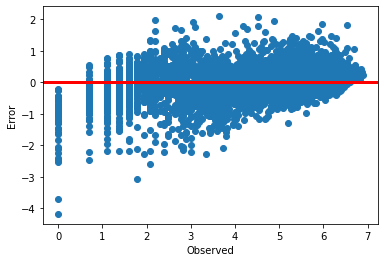

In [ ]:

error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='red')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()